# Classification Models 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('Project6_data.csv')
data.head()

,Unnamed: 0,Operator,In Out Travelling,Network Type,Rating,Call Drop Category,Latitude,Longitude,State Name,Average Data Speed Download,Average Signal Strength Download,Average Data Speed Upload,Average Signal Strength Upload,Population,Literacy Rate,Rainfall,Area of the state
0,0,Airtel,Indoor,4G,3,Satisfactory,12.998502,77.672437,Karnataka,8807.910,-94.86,2591.08,-94.840,61130704.0,75.36,1248.0,191791.0
1,1,Vodafone,Indoor,4G,1,Call Dropped,23.554190,72.620110,Gujarat,6862.552,-91.96,4671.48,-91.920,60439692.0,78.03,842.5,196024.0
2,2,Airtel,Indoor,3G,1,Call Dropped,11.327329,76.749743,Tamil Nadu,1178.410,-85.03,968.58,-85.470,72147030.0,80.33,998.0,130060.0
3,3,Airtel,Indoor,4G,3,Satisfactory,22.279660,73.149369,Gujarat,5694.480,-89.39,2515.34,-89.515,60439692.0,78.03,842.5,196024.0
4,4,Airtel,Travelling,4G,3,Satisfactory,18.546344,73.819090,Maharashtra,10804.560,-94.05,4968.27,-94.110,112374333.0,82.34,1455.5,307713.0


In [3]:
data.shape

(30785, 17)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30785 entries, 0 to 30784
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        30785 non-null  int64  
 1   Operator                          30785 non-null  object 
 2   In Out Travelling                 30785 non-null  object 
 3   Network Type                      30785 non-null  object 
 4   Rating                            30785 non-null  int64  
 5   Call Drop Category                30785 non-null  object 
 6   Latitude                          30785 non-null  float64
 7   Longitude                         30785 non-null  float64
 8   State Name                        30785 non-null  object 
 9   Average Data Speed Download       30785 non-null  float64
 10  Average Signal Strength Download  30785 non-null  float64
 11  Average Data Speed Upload         30785 non-null  float64
 12  Aver

In [5]:
data.describe()

,Unnamed: 0,Rating,Latitude,Longitude,Average Data Speed Download,Average Signal Strength Download,Average Data Speed Upload,Average Signal Strength Upload,Population,Literacy Rate,Rainfall,Area of the state
count,30785.000000,30785.000000,30785.000000,30785.000000,30785.000000,30785.000000,30785.000000,30785.000000,3.078500e+04,30785.000000,30785.000000,30785.000000
mean,15392.000000,3.527075,20.986716,77.624482,13383.178796,-91.940324,3937.800252,-87.654863,9.340490e+07,74.513815,1222.318883,221781.967549
std,8887.008355,1.480751,4.904788,4.897669,9652.418551,189.709705,2022.009990,7.696626,4.112688e+07,12.449141,463.221742,93044.821822
min,0.000000,1.000000,8.255166,69.017391,0.000000,-8407.000000,220.940000,-103.200000,2.535146e+07,10.980000,143.000000,38863.000000
25%,7696.000000,2.000000,18.547627,73.739626,5191.980000,-92.580000,2680.020000,-93.000000,6.113070e+07,70.600000,998.000000,130060.000000
50%,15392.000000,4.000000,20.303444,76.945477,10804.560000,-86.800000,4130.460000,-86.920000,9.127612e+07,76.680000,1248.000000,243286.000000
75%,23088.000000,5.000000,25.263877,80.197102,20707.870000,-84.740000,5107.230000,-84.949000,1.123743e+08,82.340000,1455.500000,307713.000000
max,30784.000000,5.000000,32.427797,95.619158,32444.069600,-63.000000,12220.910000,76.930000,1.998123e+08,94.000000,3055.000000,342239.000000


In [6]:
data.drop('Unnamed: 0', axis=1, inplace=True)

### Feature Engineering

In [7]:
# This is a 3G network type but the avg data upload speed is maximum and it is only a single entry > 98 precentile threshold.

max_thres = data['Average Data Speed Upload'].quantile(0.98)
index = data[data['Average Data Speed Upload'] > max_thres ].index
data.drop(index , axis = 0, inplace = True)
data.shape

(30784, 16)

In [8]:
max_thres = data['Average Signal Strength Upload'].quantile(0.999)
index1 = data[data['Average Signal Strength Upload'] > max_thres ].index
data.drop(index1, axis = 0, inplace = True)
data.shape

(30754, 16)

In [9]:
index2 = data[data['Rainfall'] > data['Rainfall'].quantile(0.95)].index
data.drop(index2, axis = 0, inplace = True)
data.shape

(30597, 16)

In [10]:
data.drop('State Name', axis=1, inplace= True)
data1 = data

In [11]:
data1 = pd.get_dummies(data[['Operator','In Out Travelling']])
data1.head()

,Operator_Airtel,Operator_BSNL,Operator_Idea,Operator_RJio,Operator_Vodafone,In Out Travelling_Indoor,In Out Travelling_Outdoor,In Out Travelling_Travelling
0,1,0,0,0,0,1,0,0
1,0,0,0,0,1,1,0,0
2,1,0,0,0,0,1,0,0
3,1,0,0,0,0,1,0,0
4,1,0,0,0,0,0,0,1


In [12]:
data2 = data

In [13]:
data2.drop(['Operator', 'In Out Travelling'], axis = 1, inplace=True)
data2 = pd.concat([data2,data1], axis=1)
data2.head()

,Network Type,Rating,Call Drop Category,Latitude,Longitude,Average Data Speed Download,Average Signal Strength Download,Average Data Speed Upload,Average Signal Strength Upload,Population,...,Rainfall,Area of the state,Operator_Airtel,Operator_BSNL,Operator_Idea,Operator_RJio,Operator_Vodafone,In Out Travelling_Indoor,In Out Travelling_Outdoor,In Out Travelling_Travelling
0,4G,3,Satisfactory,12.998502,77.672437,8807.910,-94.86,2591.08,-94.840,61130704.0,...,1248.0,191791.0,1,0,0,0,0,1,0,0
1,4G,1,Call Dropped,23.554190,72.620110,6862.552,-91.96,4671.48,-91.920,60439692.0,...,842.5,196024.0,0,0,0,0,1,1,0,0
2,3G,1,Call Dropped,11.327329,76.749743,1178.410,-85.03,968.58,-85.470,72147030.0,...,998.0,130060.0,1,0,0,0,0,1,0,0
3,4G,3,Satisfactory,22.279660,73.149369,5694.480,-89.39,2515.34,-89.515,60439692.0,...,842.5,196024.0,1,0,0,0,0,1,0,0
4,4G,3,Satisfactory,18.546344,73.819090,10804.560,-94.05,4968.27,-94.110,112374333.0,...,1455.5,307713.0,1,0,0,0,0,0,0,1


### Label Encoding for predicting features 

In [14]:
print(data2['Network Type'].unique())
print(data2['Call Drop Category'].unique())

['4G' '3G']
['Satisfactory' 'Call Dropped' 'Poor Voice Quality']


In [15]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

# Encoding the columns
data2.iloc[:,0] = labelencoder.fit_transform(data2.iloc[:,0].values)

data2.iloc[:,2] = labelencoder.fit_transform(data2.iloc[:,2].values)


In [16]:
print(data2['Network Type'].unique())
print(data2['Call Drop Category'].unique())

[1 0]
[2 0 1]


In [17]:
data2.head()

,Network Type,Rating,Call Drop Category,Latitude,Longitude,Average Data Speed Download,Average Signal Strength Download,Average Data Speed Upload,Average Signal Strength Upload,Population,...,Rainfall,Area of the state,Operator_Airtel,Operator_BSNL,Operator_Idea,Operator_RJio,Operator_Vodafone,In Out Travelling_Indoor,In Out Travelling_Outdoor,In Out Travelling_Travelling
0,1,3,2,12.998502,77.672437,8807.910,-94.86,2591.08,-94.840,61130704.0,...,1248.0,191791.0,1,0,0,0,0,1,0,0
1,1,1,0,23.554190,72.620110,6862.552,-91.96,4671.48,-91.920,60439692.0,...,842.5,196024.0,0,0,0,0,1,1,0,0
2,0,1,0,11.327329,76.749743,1178.410,-85.03,968.58,-85.470,72147030.0,...,998.0,130060.0,1,0,0,0,0,1,0,0
3,1,3,2,22.279660,73.149369,5694.480,-89.39,2515.34,-89.515,60439692.0,...,842.5,196024.0,1,0,0,0,0,1,0,0
4,1,3,2,18.546344,73.819090,10804.560,-94.05,4968.27,-94.110,112374333.0,...,1455.5,307713.0,1,0,0,0,0,0,0,1


### Feature Selection 

In [27]:
X = data2.drop('Network Type', axis=1)
y = data2['Network Type']

In [28]:
## Feature Selection Using Information Gain
from sklearn.feature_selection import mutual_info_classif

In [30]:
info_gain = mutual_info_classif(X,y)

In [31]:
rank_data = pd.Series(info_gain, index=X.columns)
rank_data.sort_values(ascending=False)

Average Data Speed Upload           0.520509
Average Data Speed Download         0.520378
Average Signal Strength Upload      0.519928
Average Signal Strength Download    0.514050
Latitude                            0.222764
Longitude                           0.217436
Operator_RJio                       0.176788
Operator_Vodafone                   0.034076
Rainfall                            0.026939
Area of the state                   0.025654
Population                          0.025553
Literacy Rate                       0.023599
Operator_BSNL                       0.019658
Operator_Airtel                     0.014393
Operator_Idea                       0.013393
Rating                              0.007628
Call Drop Category                  0.004348
In Out Travelling_Indoor            0.003820
In Out Travelling_Outdoor           0.000000
In Out Travelling_Travelling        0.000000
dtype: float64

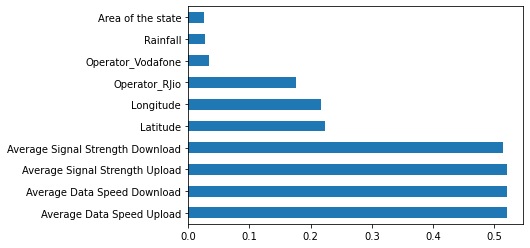

In [42]:
rank_data.nlargest(10).plot(kind='barh')
plt.show()

In [37]:
## Feature Importance

from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

In [39]:
ordered_values = model.feature_importances_

In [40]:
rank_data1 = pd.Series(ordered_values, index=X.columns)
rank_data1.sort_values(ascending=False)

Average Data Speed Upload           0.330818
Average Data Speed Download         0.201278
Operator_RJio                       0.138148
Average Signal Strength Upload      0.126276
Average Signal Strength Download    0.081229
Operator_Vodafone                   0.031991
Operator_Airtel                     0.021608
Operator_BSNL                       0.019151
Operator_Idea                       0.009545
Rainfall                            0.007863
Longitude                           0.005561
Area of the state                   0.005315
Literacy Rate                       0.005303
Population                          0.004857
Latitude                            0.004538
In Out Travelling_Travelling        0.002453
Rating                              0.001705
Call Drop Category                  0.001149
In Out Travelling_Indoor            0.000643
In Out Travelling_Outdoor           0.000570
dtype: float64

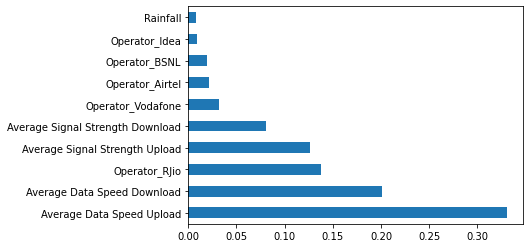

In [41]:
rank_data1.nlargest(10).plot(kind='barh')
plt.show()

<AxesSubplot:>

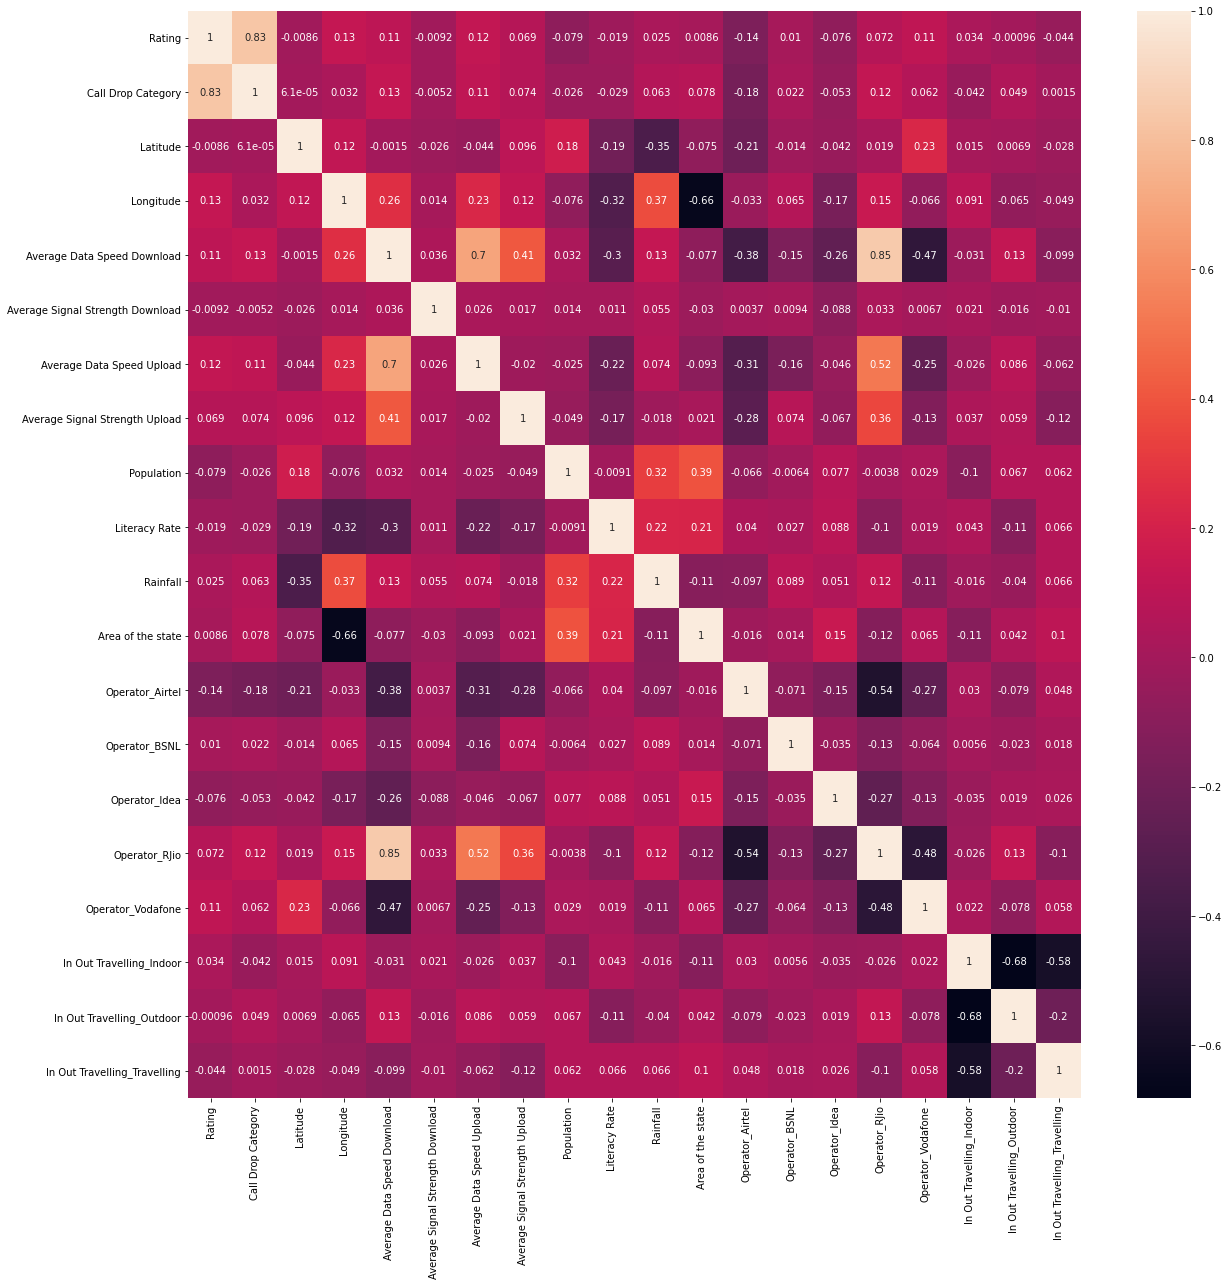

In [44]:
corr = X.corr()
top_features = corr.index
plt.figure(figsize=(20,20))
sns.heatmap(X[top_features].corr(), annot=True)


In [45]:
threshold = 0.8

In [48]:
## finding and removing the highly correlated values based on the threshold limit

def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [49]:
correlation(X, threshold)

{'Call Drop Category', 'Operator_RJio'}

### Model Creation for Network Type Feature 

In [51]:
data2.columns

Index(['Network Type', 'Rating', 'Call Drop Category', 'Latitude', 'Longitude',
       'Average Data Speed Download', 'Average Signal Strength Download',
       'Average Data Speed Upload', 'Average Signal Strength Upload',
       'Population', 'Literacy Rate', 'Rainfall', 'Area of the state',
       'Operator_Airtel', 'Operator_BSNL', 'Operator_Idea', 'Operator_RJio',
       'Operator_Vodafone', 'In Out Travelling_Indoor',
       'In Out Travelling_Outdoor', 'In Out Travelling_Travelling'],
      dtype='object')

In [53]:
df_network = data2[['Average Data Speed Download', 'Average Signal Strength Download',
       'Average Data Speed Upload', 'Average Signal Strength Upload','Latitude', 'Longitude','Network Type']]
df_network

,Average Data Speed Download,Average Signal Strength Download,Average Data Speed Upload,Average Signal Strength Upload,Latitude,Longitude,Network Type
0,8807.910,-94.860,2591.08,-94.840,12.998502,77.672437,1
1,6862.552,-91.960,4671.48,-91.920,23.554190,72.620110,1
2,1178.410,-85.030,968.58,-85.470,11.327329,76.749743,0
3,5694.480,-89.390,2515.34,-89.515,22.279660,73.149369,1
4,10804.560,-94.050,4968.27,-94.110,18.546344,73.819090,1
...,...,...,...,...,...,...,...
30780,31502.050,-72.990,6895.45,-73.030,20.342392,85.822995,1
30781,31502.050,-72.990,6895.45,-73.030,20.342392,85.822995,1
30782,905.000,-101.000,561.00,-101.000,12.986593,77.581266,0
30783,5191.980,-96.882,2981.59,-96.550,18.637340,73.768159,1


In [54]:
X = df_network.drop('Network Type', axis=1)
y = df_network['Network Type']

In [79]:
y.value_counts()

1    24029
0     6568
Name: Network Type, dtype: int64

In [56]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

In [60]:
# Scaling of data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [61]:
def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

In [62]:
## Using K fold Cross Validation

from sklearn.model_selection import cross_val_score

In [64]:
from sklearn.linear_model import LogisticRegression
cross_val_score(LogisticRegression(), X, y, cv=10)

c:\python38\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\python38\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

array([1.        , 1.        , 1.        , 1.        , 1.        ,
       0.9996732 , 1.        , 0.99934619, 1.        , 0.99836548])

In [65]:
# Use KNeighbors
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, metric = 'minkowski', p=2)
cross_val_score(knn, X, y, cv=10)

array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 0.99901929, 0.99836548])

In [66]:
# Use SVC (linear kernel)
from sklearn.svm import SVC
svc_lin = SVC(kernel = 'linear')
cross_val_score(svc_lin, X, y, cv=10)

array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 0.99836548])

In [68]:
# Use GuassianNB
from sklearn.naive_bayes import GaussianNB
guass = GaussianNB()
cross_val_score(guass, X, y, cv=10)

array([0.98627451, 0.98300654, 0.99346405, 0.99346405, 0.98954248,
       0.99542484, 0.99346405, 0.99738477, 0.99051978, 0.99444263])

In [69]:
 # Use Decision Tree
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion = 'entropy')
cross_val_score(tree, X, y, cv=10)

array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 0.99836548])

In [72]:
# Use the Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy')
cross_val_score(forest, X, y, cv=10)

array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 0.99836548])

### Final model for Network Type prediction 

In [73]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state = 0)

In [75]:
# Use the Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy')
forest.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [76]:
forest.score(X_test, y_test)

1.0

In [80]:
# Show the confusion matrix and accuracy for all the models on test data
from sklearn.metrics import confusion_matrix , classification_report

cm = confusion_matrix(y_test, forest.predict(X_test))
y_pred = forest.predict(X_test)

# Extract TN, FP, FN, TP
TN, FP, FN, TP = confusion_matrix(y_test, forest.predict(X_test)).ravel()
    
test_score = (TP+TN)/(TP+TN+FP+FN)
    
print(cm)
print("Random Forest Testing Accuracy:  ", test_score)
print("\n")
print(classification_report(y_test, y_pred))


[[1970    0]
 [   0 7210]]
Random Forest Testing Accuracy:   1.0


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1970
           1       1.00      1.00      1.00      7210

    accuracy                           1.00      9180
   macro avg       1.00      1.00      1.00      9180
weighted avg       1.00      1.00      1.00      9180



NOTE:
THERE IS NO NEED TO TACKLE CLASS IMBALANCE BECAUSE OUR MODEL'S PRECISION, RECALL AND F1-SCORE VALUES ARE ALSO 1.

In [86]:
my_pred = [[1178, -84, 961, -84, 11.3, 77.6]]
pred = forest.predict(my_pred)
pred

array([0])

# Call Drop Category feature prediction 

In [18]:
data2.head()

,Network Type,Rating,Call Drop Category,Latitude,Longitude,Average Data Speed Download,Average Signal Strength Download,Average Data Speed Upload,Average Signal Strength Upload,Population,...,Rainfall,Area of the state,Operator_Airtel,Operator_BSNL,Operator_Idea,Operator_RJio,Operator_Vodafone,In Out Travelling_Indoor,In Out Travelling_Outdoor,In Out Travelling_Travelling
0,1,3,2,12.998502,77.672437,8807.910,-94.86,2591.08,-94.840,61130704.0,...,1248.0,191791.0,1,0,0,0,0,1,0,0
1,1,1,0,23.554190,72.620110,6862.552,-91.96,4671.48,-91.920,60439692.0,...,842.5,196024.0,0,0,0,0,1,1,0,0
2,0,1,0,11.327329,76.749743,1178.410,-85.03,968.58,-85.470,72147030.0,...,998.0,130060.0,1,0,0,0,0,1,0,0
3,1,3,2,22.279660,73.149369,5694.480,-89.39,2515.34,-89.515,60439692.0,...,842.5,196024.0,1,0,0,0,0,1,0,0
4,1,3,2,18.546344,73.819090,10804.560,-94.05,4968.27,-94.110,112374333.0,...,1455.5,307713.0,1,0,0,0,0,0,0,1


In [19]:
data_initial = data2

In [20]:
data2['Call Drop Category'].value_counts()

2    21243
1     6536
0     2818
Name: Call Drop Category, dtype: int64

In [21]:
count2, count1, count0 = data2['Call Drop Category'].value_counts()

df0 = data2[data2['Call Drop Category'] == 0]
df1 = data2[data2['Call Drop Category'] == 1]
df2 = data2[data2['Call Drop Category'] == 2]

In [22]:
count2, count1, count0

(21243, 6536, 2818)

In [23]:
## Undersampling of df1 and df2 dataset

df1_under = df1.sample(count0)
df2_under = df2.sample(count0)

In [24]:
under_data = pd.concat([df0, df1_under, df2_under], axis=0)
under_data.shape

(8454, 21)

### Feature Selection 

In [25]:
X = data2.drop('Call Drop Category', axis=1)
y = data2['Call Drop Category']

In [26]:
## Feature Selection Using Information Gain

from sklearn.feature_selection import mutual_info_classif

info_gain2 = mutual_info_classif(X,y)

rank_data2 = pd.Series(info_gain2, index=X.columns)
rank_data2.sort_values(ascending=False)

Rating                              0.536364
Latitude                            0.386577
Longitude                           0.383085
Average Data Speed Download         0.105737
Average Signal Strength Download    0.103826
Average Data Speed Upload           0.103329
Average Signal Strength Upload      0.100136
Rainfall                            0.053515
Area of the state                   0.053484
Population                          0.049235
Literacy Rate                       0.045869
Operator_Airtel                     0.015196
Operator_RJio                       0.010600
In Out Travelling_Indoor            0.009192
Network Type                        0.008523
Operator_Vodafone                   0.005945
In Out Travelling_Outdoor           0.004509
Operator_Idea                       0.003016
In Out Travelling_Travelling        0.000023
Operator_BSNL                       0.000000
dtype: float64

In [27]:
## Feature Importance

from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,y)

ordered_values3 = model.feature_importances_
rank_data3 = pd.Series(ordered_values3, index=X.columns)
rank_data3.sort_values(ascending=False)

Rating                              0.604854
Latitude                            0.131780
Longitude                           0.123150
Population                          0.014213
Rainfall                            0.013431
Area of the state                   0.012763
Literacy Rate                       0.010780
Average Data Speed Download         0.010688
In Out Travelling_Indoor            0.009626
Average Data Speed Upload           0.009430
Operator_Airtel                     0.009419
Average Signal Strength Upload      0.007984
In Out Travelling_Outdoor           0.007922
Average Signal Strength Download    0.007268
Operator_RJio                       0.006995
In Out Travelling_Travelling        0.006951
Operator_Idea                       0.005238
Operator_Vodafone                   0.004448
Network Type                        0.002264
Operator_BSNL                       0.000798
dtype: float64

<AxesSubplot:>

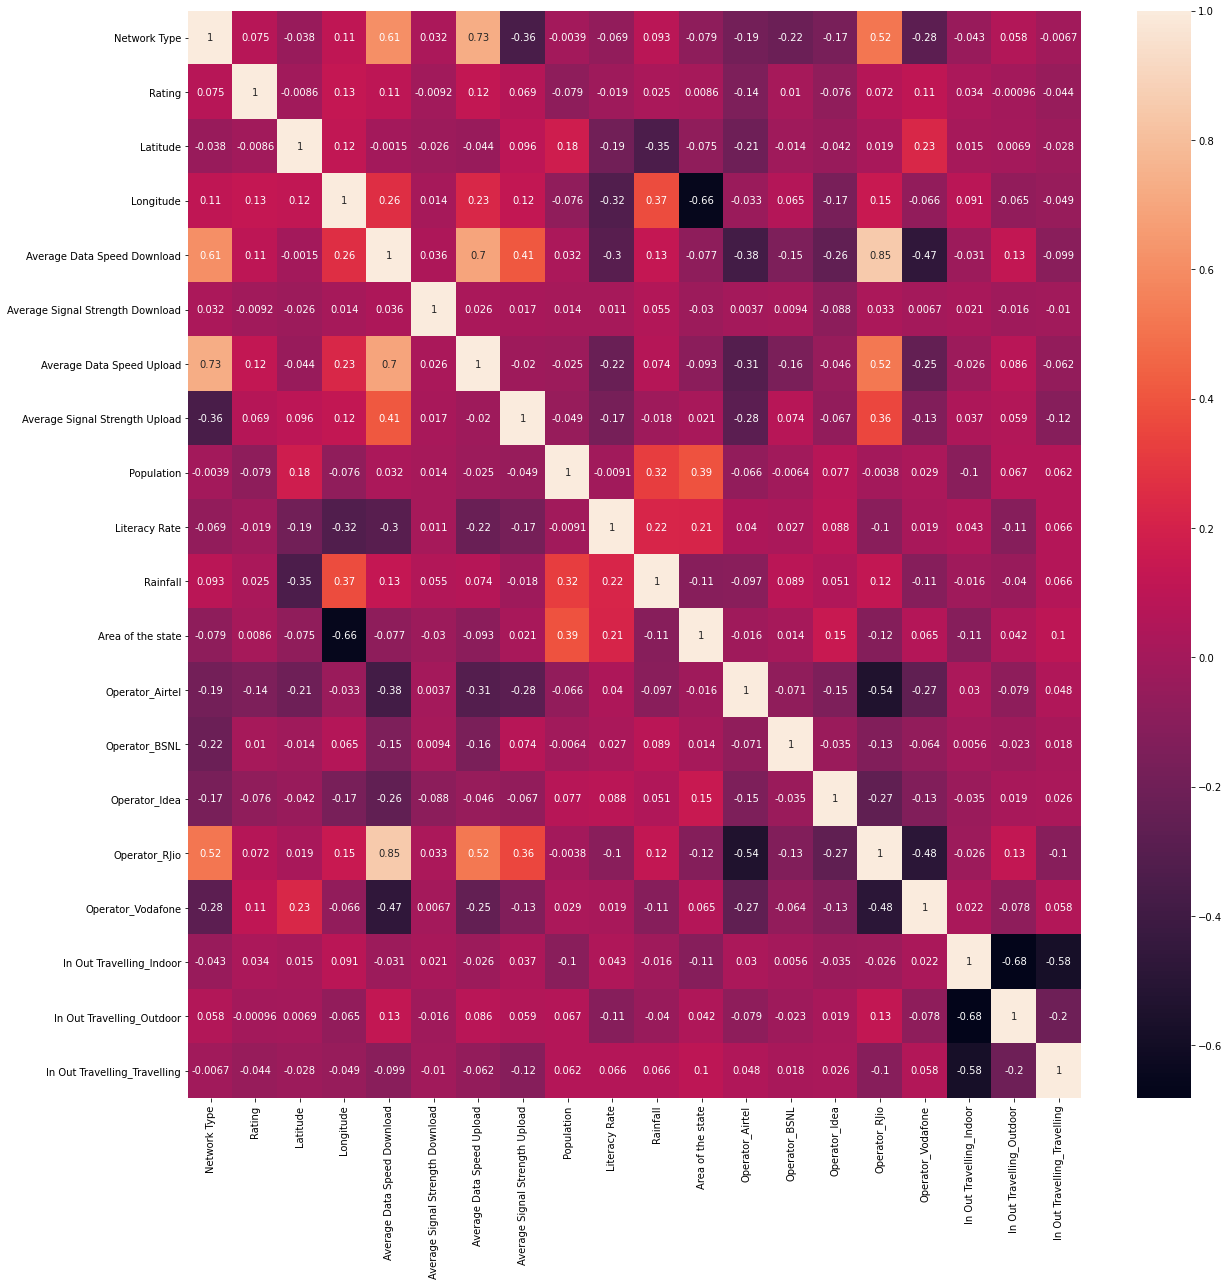

In [28]:
corr = X.corr()
top_features = corr.index
plt.figure(figsize=(20,20))
sns.heatmap(X[top_features].corr(), annot=True)

In [29]:
## Using Correlation to find independent input features

threshold = 0.7

## finding and removing the highly correlated values based on the threshold limit

def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [30]:
correlation(X, threshold)

{'Average Data Speed Upload', 'Operator_RJio'}

### Model Creation for Call Drop Category feature 

In [111]:
data2.columns

Index(['Network Type', 'Rating', 'Call Drop Category', 'Latitude', 'Longitude',
       'Average Data Speed Download', 'Average Signal Strength Download',
       'Average Data Speed Upload', 'Average Signal Strength Upload',
       'Population', 'Literacy Rate', 'Rainfall', 'Area of the state',
       'Operator_Airtel', 'Operator_BSNL', 'Operator_Idea', 'Operator_RJio',
       'Operator_Vodafone', 'In Out Travelling_Indoor',
       'In Out Travelling_Outdoor', 'In Out Travelling_Travelling'],
      dtype='object')

In [27]:
data_call = data2[['Average Data Speed Download', 'Average Signal Strength Download',
       'Average Data Speed Upload', 'Average Signal Strength Upload','Latitude', 'Longitude', 'Call Drop Category']]

In [28]:
X = data_call.drop('Call Drop Category', axis=1)
y = data_call['Call Drop Category']

In [29]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

In [30]:
# Scaling of data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [31]:
## Using K fold Cross Validation

from sklearn.model_selection import cross_val_score

In [32]:
from sklearn.linear_model import LogisticRegression
cross_val_score(LogisticRegression(), X, y, cv=10)

c:\python38\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\python38\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

array([0.69444444, 0.69444444, 0.69444444, 0.69411765, 0.69411765,
       0.69150327, 0.69411765, 0.69434456, 0.69434456, 0.69434456])

In [33]:
# Use KNeighbors
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, metric = 'minkowski', p=2)
cross_val_score(knn, X, y, cv=10)

array([0.83071895, 0.82222222, 0.80490196, 0.81045752, 0.77679739,
       0.80555556, 0.80915033, 0.81137627, 0.81693364, 0.75351422])

In [34]:
# Use GuassianNB
from sklearn.naive_bayes import GaussianNB
guass = GaussianNB()
cross_val_score(guass, X, y, cv=10)

array([0.59509804, 0.6003268 , 0.59836601, 0.25915033, 0.62124183,
       0.25784314, 0.62712418, 0.61163779, 0.65184701, 0.62275253])

In [35]:
 # Use Decision Tree
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion = 'entropy')
cross_val_score(tree, X, y, cv=10)

array([0.76928105, 0.79052288, 0.76078431, 0.7754902 , 0.75522876,
       0.75555556, 0.78169935, 0.77803204, 0.78587774, 0.70742073])

In [40]:
# Use the Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 50, criterion = 'entropy')
cross_val_score(forest, X, y, cv=10)

array([0.80326797, 0.81045752, 0.79477124, 0.79117647, 0.78235294,
       0.79281046, 0.80196078, 0.80353057, 0.81693364, 0.73978424])

### Final model for call drop category feature 

In [54]:
# Use the Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 30, criterion = 'entropy')
forest.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=30)

In [55]:
forest.score(X_test, y_test)

0.5360662199448167

In [56]:
# Show the confusion matrix and accuracy for all the models on test data
from sklearn.metrics import confusion_matrix , classification_report

cm = confusion_matrix(y_test, forest.predict(X_test))
y_pred = forest.predict(X_test)

# Extract TN, FP, FN, TP
#TN, FP, FN, TP = confusion_matrix(y_test, forest.predict(X_test)).ravel()
    
#test_score = (TP+TN)/(TP+TN+FP+FN)
    
#print(cm)
#print("Random Forest Testing Accuracy:  ", test_score)
print("\n")
print(classification_report(y_test, y_pred))




              precision    recall  f1-score   support

           0       0.52      0.44      0.47       837
           1       0.51      0.56      0.53       829
           2       0.58      0.61      0.59       871

    accuracy                           0.54      2537
   macro avg       0.53      0.54      0.53      2537
weighted avg       0.54      0.54      0.53      2537



### Prediction through Undersampled dataset 

In [48]:
underdata_call = under_data[['Average Data Speed Download', 'Average Signal Strength Download',
       'Average Data Speed Upload', 'Average Signal Strength Upload','Latitude', 'Longitude', 'Call Drop Category']]

X = underdata_call.drop('Call Drop Category', axis=1)
y = underdata_call['Call Drop Category']

In [49]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

# Scaling of data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [57]:
# Use the Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 30, criterion = 'entropy')
forest.fit(X_train, y_train)

forest.score(X_test, y_test)

0.5494678754434371

In [58]:
# Show the confusion matrix and accuracy for all the models on test data
from sklearn.metrics import confusion_matrix , classification_report

cm = confusion_matrix(y_test, forest.predict(X_test))
y_pred = forest.predict(X_test)

# Extract TN, FP, FN, TP
#TN, FP, FN, TP = confusion_matrix(y_test, forest.predict(X_test)).ravel()
    
#test_score = (TP+TN)/(TP+TN+FP+FN)
    
#print(cm)
#print("Random Forest Testing Accuracy:  ", test_score)
print("\n")
print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

           0       0.52      0.50      0.51       837
           1       0.55      0.56      0.55       829
           2       0.57      0.59      0.58       871

    accuracy                           0.55      2537
   macro avg       0.55      0.55      0.55      2537
weighted avg       0.55      0.55      0.55      2537



### Prediction through Oversampled dataset 

In [59]:
count2, count1, count0 = data2['Call Drop Category'].value_counts()

df0 = data2[data2['Call Drop Category'] == 0]
df1 = data2[data2['Call Drop Category'] == 1]
df2 = data2[data2['Call Drop Category'] == 2]

In [60]:
count2, count1, count0

(21243, 6536, 2818)

In [62]:
## Undersampling of df1 and df2 dataset
df1_over = df1.sample(count2, replace=True)
df0_over = df0.sample(count2, replace=True)

In [63]:
OverData = pd.concat([df2, df1_over, df0_over], axis=0)
OverData.shape

(63729, 21)

In [64]:
overdata_call = OverData[['Average Data Speed Download', 'Average Signal Strength Download',
       'Average Data Speed Upload', 'Average Signal Strength Upload','Latitude', 'Longitude', 'Call Drop Category']]

X = overdata_call.drop('Call Drop Category', axis=1)
y = overdata_call['Call Drop Category']

In [65]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

# Scaling of data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [69]:
# Use the Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 50, criterion = 'entropy')
forest.fit(X_train, y_train)

forest.score(X_test, y_test)

0.5739839949788169

In [70]:
# Show the confusion matrix and accuracy for all the models on test data
from sklearn.metrics import confusion_matrix , classification_report

cm = confusion_matrix(y_test, forest.predict(X_test))
y_pred = forest.predict(X_test)

# Extract TN, FP, FN, TP
#TN, FP, FN, TP = confusion_matrix(y_test, forest.predict(X_test)).ravel()
    
#test_score = (TP+TN)/(TP+TN+FP+FN)
    
#print(cm)
#print("Random Forest Testing Accuracy:  ", test_score)
print("\n")
print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

           0       0.67      0.37      0.47      6390
           1       0.59      0.58      0.58      6399
           2       0.53      0.78      0.63      6330

    accuracy                           0.57     19119
   macro avg       0.60      0.57      0.56     19119
weighted avg       0.60      0.57      0.56     19119



### Note:
Undersampled Dataset gives much higher F1 score values then Oversampled and General dataset. Random Forest Classifier predicts well on Call Drop Category Feature Classification.

Point to Remember:  I did not consider Rating in the model creation. According to me, It is a feedback feature from the customer and i think that it is not good to incorporate the feature in the model.